<b>Introduction<br></b>
This project analyzes data from on-line dating application OKCupid.
In recent years, there has been a massive rise in the usage of dating apps to find love.
Many of these apps use sophisticated data science techniques to recommend possible matches to users
and to optimize the user experience. These apps give us access to a wealth of information 
that we've never had before about how different people experience romance.

<b>Project Goals</b><br>
To answer a question whether an OkCupid's user astrological sign can be predicted using other variables from their profiles.


<b>Data
</b><br>Each row in profiles.csv represents single user and columns represents information about their profiles on dating app.

In [1]:
#imports
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import regex as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from matplotlib import pyplot as plt
import itertools
from collections import Counter
from nltk import ngrams

In [2]:
#loading data
data = pd.read_csv("C:/Users/OEM/Desktop/cc_projekty/okcupid/profiles.csv", encoding='utf-8')
pd.set_option("display.max_columns",32)

In [3]:
print(data.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


<b>The columns in the dataset include:<br>



age: continuous variable of age of user<br>
body_type: categorical variable of body type of user<br>
diet: categorical variable of dietary information<br>
drinks: categorical variable of alcohol consumption<br>
drugs: categorical variable of drug usage<br>
education: categorical variable of educational attainment<br>
ethnicity: categorical variable of ethnic backgrounds<br>
height: continuous variable of height of user<br>
income: continuous variable of income of user<br>
job: categorical variable of employment description<br>
offspring: categorical variable of children status<br>
orientation: categorical variable of sexual orientation<br>
pets: categorical variable of pet preferences<br>
religion: categorical variable of religious background<br>
sex: categorical variable of gender<br>
sign: categorical variable of astrological symbol<br>
smokes: categorical variable of smoking consumption<br>
speaks: categorical variable of language spoken<br>
status: categorical variable of relationship status<br>
last_online: date variable of last login<br>
location: categorical variable of user locations<br>
    
And a set of open short-answer responses to :<br><br>

essay0: My self summary<br>
essay1: What I’m doing with my life<br>
essay2: I’m really good at<br>
essay3: The first thing people usually notice about me<br>
essay4: Favorite books, movies, show, music, and food<br>
essay5: The six things I could never do without<br>
essay6: I spend a lot of time thinking about<br>
essay7: On a typical Friday night I am<br>
essay8: The most private thing I am willing to admit<br>
essay9: You should message me if…<br></b>


<span style="font-size: x-large"><b>Visualizing some of the data  </b></span>

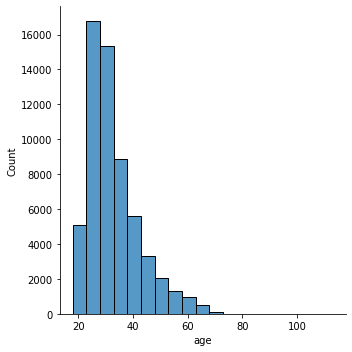

In [38]:
#age distribution
sns.displot(data=data, x="age", kind="hist", binwidth = 5);

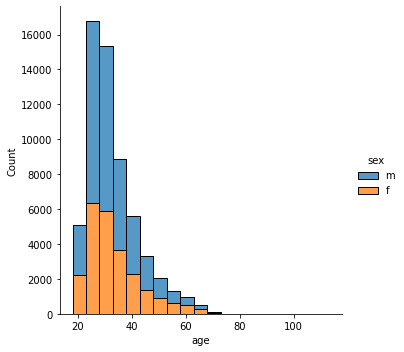

In [39]:
sns.displot(data=data, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

shows that many more men using dating app than women

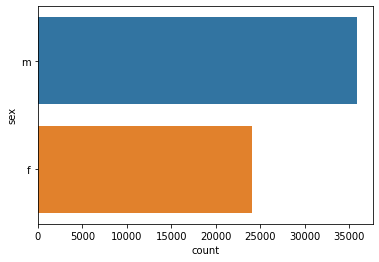

In [40]:
sns.countplot(data=data, y="sex");

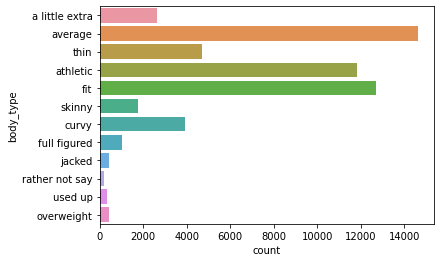

In [41]:
sns.countplot(data=data, y="body_type");

users mostly described themselves as athletic/fit or average

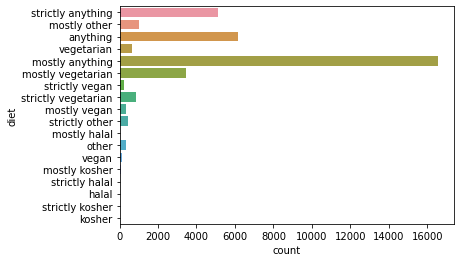

In [42]:
sns.countplot(data=data, y="diet");

main group could eat anything but there's huge trend of vegetarian

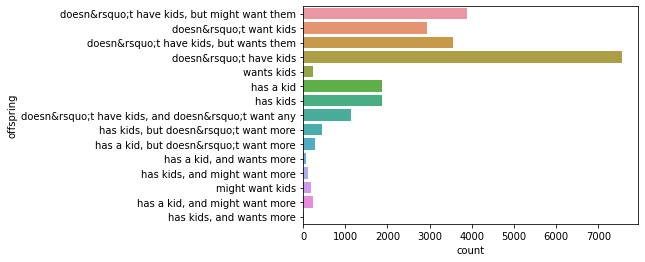

In [43]:
sns.countplot(data=data, y="offspring");

Most of the users do not have kids

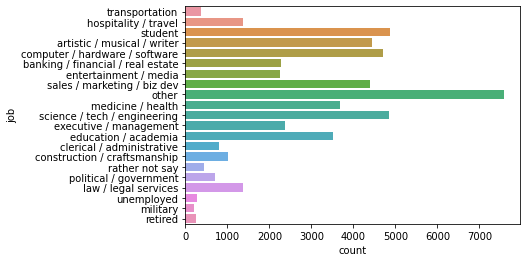

In [44]:
sns.countplot(data=data, y="job");

a lot of users don't fit into proposed job categories

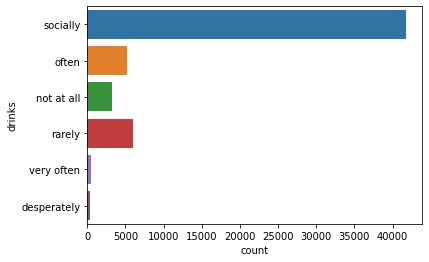

In [45]:
sns.countplot(data=data, y="drinks");

most of the users drinks socially


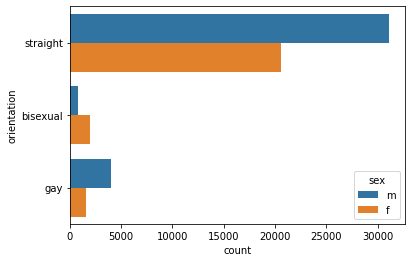

In [46]:
sns.countplot(data=data, y="orientation", hue = "sex");

even though there is many more men observation in the data there are twice as bisexual women as men

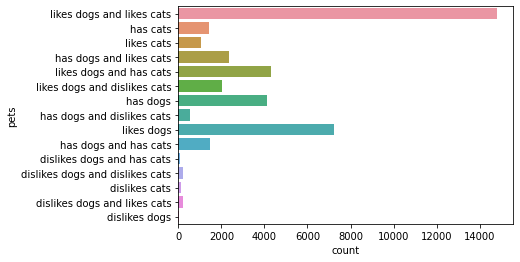

In [47]:
sns.countplot(data=data, y="pets");

plot shows how users like cats or dogs

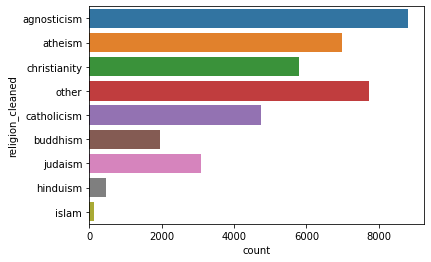

In [48]:
#cleaning religion column
data['religion_cleaned'] = data.religion.str.split().str.get(0)
sns.countplot(data=data, y="religion_cleaned");

shows religious beliefs of users

In [49]:
#creating index which will be helpful to merge datasets after nan values were removed
lista = list(range(0,len(data)))
lista_series = pd.Series(lista)
data['index']= lista_series
print(data.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [50]:
#cheking data types 
print(data.dtypes)

age                   int64
body_type            object
diet                 object
drinks               object
drugs                object
education            object
essay0               object
essay1               object
essay2               object
essay3               object
essay4               object
essay5               object
essay6               object
essay7               object
essay8               object
essay9               object
ethnicity            object
height              float64
income                int64
job                  object
last_online          object
location             object
offspring            object
orientation          object
pets                 object
religion             object
sex                  object
sign                 object
smokes               object
speaks               object
status               object
religion_cleaned     object
index                 int64
dtype: object


In [51]:
print(len(data))
#checking nan values
print(data.isna().sum())

59946
age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
religion_cleaned    20226
index                   0
dtype: int64


<span style="font-size: x-large"><b>Extracting information from essay2 column which describes describe things which users are good at  </b></span>

In [52]:

good_at = copy.deepcopy(data[['essay2','index']])
good_at.dropna(inplace=True)
list_of_str = good_at.essay2.tolist()
print(list_of_str[:6])
string_good_at = ''
for i in list_of_str:
    string_good_at+= str(i)



['making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.', 'being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;)', 'improvising in different contexts. alternating between being\npresent and decidedly outside of a moment, or trying to hold both\nat once. rambling intellectual conversations that hold said\nconversations in contempt while seeking to find something that\ntranscends them. being critical while remaining generous. listening\nto and using body language--often performed in caricature or large\ngestures, if not outright interpretive dance. dry, dark, and\nraunchy humor.', 'playing synthesizers and organizing books according to the library\nof congress classification system', 'creating imagery to look at:<br />\nhttp://bagsbrown.blogspot.com/<br />\nhttp://stayruly.blogspot.com/', "imagining random shit. laughing at aforementioned random shit.\nbeing goofy. artic

In [53]:
#noise removal
def noise_rem(list_of_string):
    clean_strings=[]
    #for each string
    for string in list_of_string:
        result=re.sub(r'[^a-zA-Z]'," ",string)
        result=re.sub(r'\_'," ",result)
        result=re.sub(r'^[ap]m$'," ",result)
        result=re.sub(r'class=?'," ",result)
        result=re.sub(r'\<'," ",result)
        result=re.sub(r'href=?'," ",result)
        result=re.sub(r'br',"",result)
        result=result.lower()
        clean_strings.append(result)
    return clean_strings


list_of_str_cleaned=noise_rem(list_of_str)


In [54]:
print(list_of_str_cleaned[:6])

['making people laugh      ranting about a good salting      finding simplicity in complexity  and complexity in simplicity ', 'being silly  having ridiculous amonts of fun wherever  being a smart ass  ohh and i can cook    ', 'improvising in different contexts  alternating between being present and decidedly outside of a moment  or trying to hold both at once  rambling intellectual conversations that hold said conversations in contempt while seeking to find something that transcends them  being critical while remaining generous  listening to and using body language  often performed in caricature or large gestures  if not outright interpretive dance  dry  dark  and raunchy humor ', 'playing synthesizers and organizing books according to the liary of congress  ification system', 'creating imagery to look at      http   bagsown blogspot com      http   stayruly blogspot com ', 'imagining random shit  laughing at aforementioned random shit  being goofy  articulating what i think and feel 

In [55]:
#tokenization
def tokenizer(strings):
    tokenized_strings=[]
    for string in strings:
        tokenized=word_tokenize(string)
        tokenized_strings.append(tokenized)
    return tokenized_strings

list_of_str_tokenized=tokenizer(list_of_str_cleaned)



In [56]:
#removing stop_words              
def filter(tokenized):
    filtered=[]
    stop_words = set(stopwords.words('english')) 
    for sentence in tokenized:
        filtered_sen=[word for word in sentence if not word in stop_words ]
        filtered.append(filtered_sen)
    return filtered
list_of_str_filtered = filter(list_of_str_tokenized)
#sms_filtered = filter(sms_tokenized)

In [57]:
#stemming
def stemming(list_of_sentence):
    stemmer= PorterStemmer()
    stemmed_sen=[]
    for sentence in list_of_sentence:
        stemmed=[stemmer.stem(word) for word in sentence]
        stemmed_sen.append(stemmed)
    return stemmed_sen
#smss ready to be analyzed
stemmed_list_of_str=stemming(list_of_str_filtered)
#stemmed_sms=stemming(sms_filtered)

In [58]:
#lemmatization with tagged part of speech
def lemmatization(list_of_sen):
    lemmatized_sen=[]
    lemmatizer= WordNetLemmatizer()
    for sentence in list_of_sen:
        #lematizaiton with part of speech
        lemmatized=[lemmatizer.lemmatize(word,get_part_of_speech(word)) for word in sentence]
        lemmatized_sen.append(lemmatized)
    return lemmatized_sen
from collections import Counter
from nltk.corpus import wordnet
def get_part_of_speech(word):
    #getting synonyms
  probable_part_of_speech = wordnet.synsets(word)
  
  pos_counts = Counter()
    #count types of synonyms and return the most frequent part of speech
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

lemmatized_list_of_str=lemmatization(stemmed_list_of_str)
#lemmatized_sms=lemmatization(stemmed_sms)

In [59]:
#print(lemmatized_sms[])
from nltk import pos_tag
import nltk
#tagging part-of-speech
tagged_list_of_str= [pos_tag(sen) for sen in lemmatized_list_of_str]
#print(tagged_sms[:10000])

In [60]:
#defining chunk parser and chunk grammar 
chunk_grammar="NP: {<DT>?<JJ>*<NN>}"
parser = nltk.RegexpParser(chunk_grammar)
#print(parser.parse(tagged_sms[2]))
parsed_sms_np=[parser.parse(sen) for sen in tagged_list_of_str]


In [61]:
#frequency analysis
# function that pulls chunks out of chunked sentence and finds the most common chunks
def chunk_counter(parsed_sens,type_of_chunk):
    chunks=list()
    #for-loop through each chunked sentence to extract noun phrase chunks
    for chunked_sentence in parsed_sens:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == type_of_chunk):
            chunks.append(tuple(subtree))
    chunk_counter = Counter()
    #for-loop through the list of chunks
    for chunk in chunks:
        chunk_counter[chunk]+=1
    #return 30 most frequent chunks
    return chunk_counter.most_common(40)

most_common_np_chunks=chunk_counter(parsed_sms_np,'NP')
print(most_common_np_chunks)

[((('peopl', 'NN'),), 8491), ((('cook', 'NN'),), 6611), ((('interest', 'NN'),), 5281), ((('thing', 'NN'),), 5080), ((('friend', 'NN'),), 3200), ((('danc', 'NN'),), 3120), ((('realli', 'NN'),), 3071), ((('play', 'NN'),), 3037), ((('work', 'NN'),), 2778), ((('time', 'NN'),), 2249), ((('talk', 'NN'),), 2037), ((('music', 'NN'),), 1901), ((('love', 'NN'),), 1895), ((('game', 'NN'),), 1830), ((('laugh', 'NN'),), 1819), ((('fun', 'NN'),), 1815), ((('lot', 'NN'),), 1745), ((('eat', 'NN'),), 1722), ((('problem', 'NN'),), 1709), ((('life', 'NN'),), 1663), ((('help', 'NN'),), 1489), ((('care', 'NN'),), 1472), ((('stuff', 'NN'),), 1464), ((('use', 'NN'),), 1450), ((('ilink', 'NN'),), 1426), ((('sport', 'NN'),), 1333), ((('tell', 'NN'),), 1286), ((('way', 'NN'),), 1261), ((('food', 'NN'),), 1254), ((('travel', 'NN'),), 1240), ((('plan', 'NN'),), 1239), ((('word', 'NN'),), 1235), ((('get', 'NN'),), 1133), ((('anyth', 'NN'),), 1119), ((('person', 'NN'),), 1104), ((('solv', 'NN'),), 1081), ((('tri', 

In [75]:
print(most_common_np_chunks[3][1])
#list for types of things people think they are good at(nouns)
activities2=[]
#number of occurance
frequency2=[]
#getting frequency and words connected to each other from list with number of occurrence of every chunk
for i in range(len(most_common_np_chunks)):
    if len(most_common_np_chunks[i][0])>=1:
        string=''
        count=most_common_np_chunks[i][1]
        for word in most_common_np_chunks[i][0]:
            string += word[0]+' '
        frequency2.append(count)
        activities2.append(string)   
    #elif len(most_common_np_chunks[i][0])==3:
     #   pass

print(activities2)

5080
['peopl ', 'cook ', 'interest ', 'thing ', 'friend ', 'danc ', 'realli ', 'play ', 'work ', 'time ', 'talk ', 'music ', 'love ', 'game ', 'laugh ', 'fun ', 'lot ', 'eat ', 'problem ', 'life ', 'help ', 'care ', 'stuff ', 'use ', 'ilink ', 'sport ', 'tell ', 'way ', 'food ', 'travel ', 'plan ', 'word ', 'get ', 'anyth ', 'person ', 'solv ', 'tri ', 'feel ', 'enjoy ', 'comput ']


Text(0.5, 0, 'Frequency')

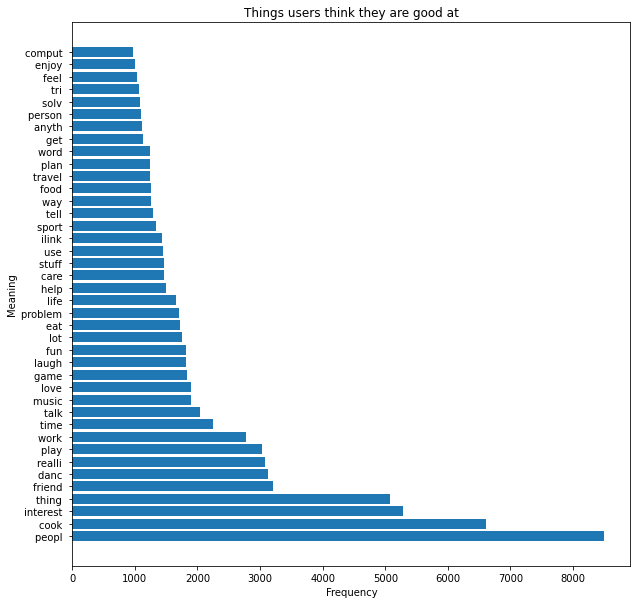

In [76]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
plt.barh(activities2,frequency2)
plt.title("Things users think they are good at")
plt.ylabel("Meaning")
plt.xlabel("Frequency")

In [62]:
#changing chunk grammar
chunk_grammar_2="VP: {<VB.*><DT>?<JJ>*<NN><RB.?>?}"
parser2 = nltk.RegexpParser(chunk_grammar_2)
parsed_sms_vp=[parser2.parse(sen) for sen in tagged_list_of_str]
#determining actions or how they are described
most_common_vp_chunks=chunk_counter(parsed_sms_vp,'VP')
print(most_common_vp_chunks)

[((('ilink', 'VBP'), ('interest', 'NN')), 2294), ((('make', 'VB'), ('peopl', 'NN')), 1840), ((('make', 'VBP'), ('peopl', 'NN')), 972), ((('make', 'VBP'), ('peopl', 'JJ'), ('laugh', 'NN')), 451), ((('make', 'VBP'), ('friend', 'NN')), 311), ((('take', 'VB'), ('care', 'NN')), 305), ((('make', 'VBP'), ('peopl', 'JJ'), ('feel', 'NN')), 266), ((('make', 'VBP'), ('thing', 'NN')), 254), ((('make', 'VB'), ('friend', 'NN')), 198), ((('put', 'VBD'), ('mind', 'NN')), 193), ((('get', 'VB'), ('thing', 'NN')), 187), ((('ilink', 'VB'), ('interest', 'NN')), 177), ((('find', 'VB'), ('way', 'NN')), 171), ((('learn', 'VBP'), ('new', 'JJ'), ('thing', 'NN')), 170), ((('make', 'VB'), ('thing', 'NN')), 160), ((('feel', 'VB'), ('comfort', 'NN')), 154), ((('take', 'VBP'), ('care', 'NN')), 150), ((('make', 'VBP'), ('list', 'NN')), 147), ((('set', 'VBN'), ('mind', 'NN')), 126), ((('make', 'VBP'), ('new', 'JJ'), ('friend', 'NN')), 124), ((('make', 'VBP'), ('laugh', 'NN')), 116), ((('make', 'VBP'), ('fun', 'NN')), 

In [63]:

print(most_common_vp_chunks[3][1])
#list for types of things people think they are good at()
activities=[]
#number of occurance
frequency=[]
for i in range(len(most_common_vp_chunks)):
    if len(most_common_vp_chunks[i][0])>=1:
        string=''
        count=most_common_vp_chunks[i][1]
        for word in most_common_vp_chunks[i][0]:
            string += word[0]+' '
        frequency.append(count)
        activities.append(string)   
   

print(frequency)


451
[2294, 1840, 972, 451, 311, 305, 266, 254, 198, 193, 187, 177, 171, 170, 160, 154, 150, 147, 126, 124, 116, 103, 99, 92, 90, 89, 89, 88, 88, 87, 85, 82, 80, 80, 75, 73, 66, 65, 65, 63]


Text(0.5, 0, 'Frequency')

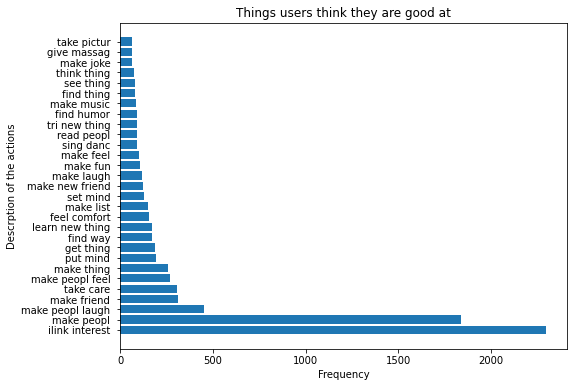

In [64]:
plt.figure(figsize=(8,6))
ax=plt.subplot()
plt.barh(activities,frequency)
plt.title("Things users think they are good at")
plt.ylabel("Descrption of the actions")
plt.xlabel("Frequency")

In [77]:
#changing chunk grammar
chunk_grammar_3="VP: {<VB.*><DT>?<JJ>+<NN><RB.?>?}"
parser3 = nltk.RegexpParser(chunk_grammar_3)
parsed_sms_vp2=[parser3.parse(sen) for sen in tagged_list_of_str]
#determining actions or how they are described
most_common_vp2_chunks=chunk_counter(parsed_sms_vp2,'VP')
print(most_common_vp2_chunks)

[((('make', 'VBP'), ('peopl', 'JJ'), ('laugh', 'NN')), 451), ((('make', 'VBP'), ('peopl', 'JJ'), ('feel', 'NN')), 266), ((('learn', 'VBP'), ('new', 'JJ'), ('thing', 'NN')), 170), ((('make', 'VBP'), ('new', 'JJ'), ('friend', 'NN')), 124), ((('make', 'VB'), ('peopl', 'JJ'), ('laugh', 'NN')), 92), ((('tri', 'VBD'), ('new', 'JJ'), ('thing', 'NN')), 88), ((('learn', 'VB'), ('new', 'JJ'), ('thing', 'NN')), 88), ((('make', 'VB'), ('new', 'JJ'), ('friend', 'NN')), 66), ((('keep', 'VB'), ('open', 'JJ'), ('mind', 'NN')), 50), ((('see', 'VBP'), ('big', 'JJ'), ('pictur', 'NN')), 45), ((('make', 'VBP'), ('other', 'JJ'), ('feel', 'NN')), 45), ((('make', 'VBP'), ('other', 'JJ'), ('laugh', 'NN')), 38), ((('tri', 'VBP'), ('new', 'JJ'), ('thing', 'NN')), 37), ((('find', 'VBP'), ('silver', 'JJ'), ('line', 'NN')), 36), ((('tri', 'VBZ'), ('new', 'JJ'), ('thing', 'NN')), 35), ((('make', 'VB'), ('other', 'JJ'), ('laugh', 'NN')), 35), ((('make', 'VBP'), ('ilink', 'JJ'), ('interest', 'NN')), 34), ((('put', 'VB

In [78]:
print(most_common_vp2_chunks)
#list for types of things people think they are good at()
activities2=[]
#number of occurance
frequency2=[]
for i in range(len(most_common_vp2_chunks)):
    if len(most_common_vp2_chunks[i][0])>=1:
        string=''
        count=most_common_vp2_chunks[i][1]
        for word in most_common_vp2_chunks[i][0]:
            string += word[0]+' '
        frequency2.append(count)
        activities2.append(string)   
   



[((('make', 'VBP'), ('peopl', 'JJ'), ('laugh', 'NN')), 451), ((('make', 'VBP'), ('peopl', 'JJ'), ('feel', 'NN')), 266), ((('learn', 'VBP'), ('new', 'JJ'), ('thing', 'NN')), 170), ((('make', 'VBP'), ('new', 'JJ'), ('friend', 'NN')), 124), ((('make', 'VB'), ('peopl', 'JJ'), ('laugh', 'NN')), 92), ((('tri', 'VBD'), ('new', 'JJ'), ('thing', 'NN')), 88), ((('learn', 'VB'), ('new', 'JJ'), ('thing', 'NN')), 88), ((('make', 'VB'), ('new', 'JJ'), ('friend', 'NN')), 66), ((('keep', 'VB'), ('open', 'JJ'), ('mind', 'NN')), 50), ((('see', 'VBP'), ('big', 'JJ'), ('pictur', 'NN')), 45), ((('make', 'VBP'), ('other', 'JJ'), ('feel', 'NN')), 45), ((('make', 'VBP'), ('other', 'JJ'), ('laugh', 'NN')), 38), ((('tri', 'VBP'), ('new', 'JJ'), ('thing', 'NN')), 37), ((('find', 'VBP'), ('silver', 'JJ'), ('line', 'NN')), 36), ((('tri', 'VBZ'), ('new', 'JJ'), ('thing', 'NN')), 35), ((('make', 'VB'), ('other', 'JJ'), ('laugh', 'NN')), 35), ((('make', 'VBP'), ('ilink', 'JJ'), ('interest', 'NN')), 34), ((('put', 'VB

Text(0.5, 0, 'Frequency')

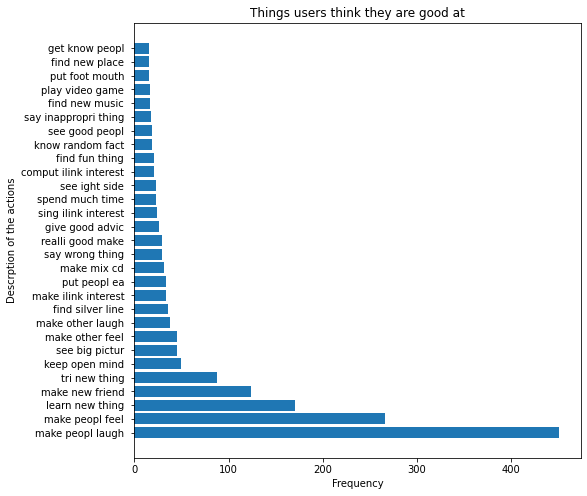

In [80]:
plt.figure(figsize=(8,8))
ax=plt.subplot()
plt.barh(activities2,frequency2)
plt.title("Things users think they are good at")
plt.ylabel("Descrption of the actions")
plt.xlabel("Frequency")

<b>Preparing data to a model</b>

In [6]:
#Creating df with column of Nan,ing whether users are good at cooking

good_at['good_at_cooking']=good_at.essay2.apply(lambda x: 1 if re.match(r'cook(ing)?',x) else 0 )

#print(good_at['good_at_cooking'].value_counts())


#expanding colwidth to check whether 1's likes cooking
pd.set_option('display.max_colwidth', 100)
print(good_at[good_at.index==16])

                                                                                                 essay2  \
16  i'm from louisiana, so cooking and eating are pretty much ingrained\ninto my dna. there's a drin...   

    index  good_at_cooking  
16     16                0  


In [7]:
#Creating df with column of Nan,ing whether users are good at singing, dancing
good_at['good_at_singing_dancing']=good_at.essay2.apply(lambda x: 1 if re.match(r'(sing(ing)?|danc(e|ing)?)',x) else 0 )



In [8]:
#changing values names
data.offspring=data.offspring.replace('doesn&rsquo;t','not',regex=True)
data.offspring=data.offspring.replace(' might','',regex=True)
data.offspring=data.offspring.replace('wants','want',regex=True)
data.offspring=data.offspring.replace('kids','kid',regex=True)

#copy offspring column
offspring = copy.deepcopy(data[['offspring','index']])

offspring.offspring=offspring.offspring.replace('a kid','kid',regex=True)
offspring.dropna(inplace=True)
offspring.offspring=offspring.offspring.replace('not have kid, but want them','want kid',regex=True)
offspring.offspring=offspring.offspring.replace("not have kid, and not want any",'not want kid',regex=True)
offspring.offspring=offspring.offspring.replace("might ",'',regex=True)

offspring.offspring=offspring.offspring.replace("not want kid",'dont_want_dont_have',regex=True)
offspring.offspring=offspring.offspring.replace("want kid",'want_kids_dont_have',regex=True)

#creating four category 
'''
                want                 dont want
                
have        want_kids_have          dont_want_have

dont have   want_kids_dont_have     dont_want_dont_have


and have_kids && dont_have_kids

'''
#changing data type obj to categorical
offspring.offspring=pd.Categorical(offspring.offspring,categories=['want_kids_dont_have' ,'dont_want_dont_have', 'not have kid',\
                                                                   'has kid','has kid, but not want more',\
                                                                   'has kid, and want more'],ordered=False)
#one hot encoding on drinks, creating binary columns of every feature
offspring = pd.get_dummies(data=offspring,columns=['offspring']) 

#print(offspring)
print(offspring.columns)


Index(['index', 'offspring_want_kids_dont_have',
       'offspring_dont_want_dont_have', 'offspring_not have kid',
       'offspring_has kid', 'offspring_has kid, but not want more',
       'offspring_has kid, and want more'],
      dtype='object')


In [9]:
#droping nan in picked columns
cols=[ 'religion_cleaned','job','body_type','diet','smokes','drinks','drugs','sign','index']
df_rf1 = data[cols].dropna()
#print(len(df_rf1))

In [10]:
#cleaning sign column, splitting string with space and get first element
df_rf1.sign=df_rf1.sign.apply(lambda x : x.split(' ')[0] if len(x)>0 else x)


In [11]:
#one hot encoding on list of columns, creating binary columns of every feature
for col in cols[:-2]:
    df_rf1 = pd.get_dummies(df_rf1, columns=[col], prefix = [col])


In [12]:
print(df_rf1.head())

           sign  index  religion_cleaned_agnosticism  \
0        gemini      0                             1   
1        cancer      1                             1   
7   sagittarius      7                             0   
9        cancer      9                             0   
11          leo     11                             0   

    religion_cleaned_atheism  religion_cleaned_buddhism  \
0                          0                          0   
1                          0                          0   
7                          0                          0   
9                          1                          0   
11                         0                          0   

    religion_cleaned_catholicism  religion_cleaned_christianity  \
0                              0                              0   
1                              0                              0   
7                              0                              1   
9                              0        

In [13]:
#merging binary values created from offspring column to clf
df_rf2 = pd.merge(df_rf1,offspring,on='index',suffixes=('', '_delme'))
#adding column with users good_at cooking/singing_dancing'
df_rf2 = pd.merge(df_rf2,good_at[['good_at_singing_dancing','good_at_cooking','index']],on='index',suffixes=('', '_delme'))
print(df_rf2.columns)

Index(['sign', 'index', 'religion_cleaned_agnosticism',
       'religion_cleaned_atheism', 'religion_cleaned_buddhism',
       'religion_cleaned_catholicism', 'religion_cleaned_christianity',
       'religion_cleaned_hinduism', 'religion_cleaned_islam',
       'religion_cleaned_judaism', 'religion_cleaned_other',
       'job_artistic / musical / writer',
       'job_banking / financial / real estate',
       'job_clerical / administrative', 'job_computer / hardware / software',
       'job_construction / craftsmanship', 'job_education / academia',
       'job_entertainment / media', 'job_executive / management',
       'job_hospitality / travel', 'job_law / legal services',
       'job_medicine / health', 'job_military', 'job_other',
       'job_political / government', 'job_rather not say', 'job_retired',
       'job_sales / marketing / biz dev', 'job_science / tech / engineering',
       'job_student', 'job_transportation', 'job_unemployed',
       'body_type_a little extra', 'body_t

In [43]:
#splitting data into train,test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_rf2[['smokes_no', 'smokes_sometimes',
       'smokes_trying to quit',  'smokes_yes','drugs_often',
        'drinks_not at all', 'drinks_often','smokes_when drinking',
       'drinks_rarely', 'drinks_socially', 'drugs_never',
        'drugs_sometimes',\
                                                            'religion_cleaned_agnosticism',
       'religion_cleaned_atheism', 'religion_cleaned_buddhism',
       'religion_cleaned_catholicism', 'religion_cleaned_christianity',
       'religion_cleaned_other',
       'religion_cleaned_judaism', \
                                                            'good_at_singing_dancing',
       'good_at_cooking',\
                                                            'job_artistic / musical / writer','job_medicine / health',
                                                             'job_science / tech / engineering'
                                                            
                                                           
       ]], df_rf2[['sign']], test_size=0.3, random_state=42)
y_train=np.ravel(y_train)

In [45]:
from sklearn.ensemble import RandomForestClassifier
#initialize classifier
clf=RandomForestClassifier(n_estimators=1000,bootstrap=True,random_state=0)

In [46]:
#train classifier
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [47]:
print(clf.n_features_)
print(clf.feature_importances_)

24
[0.0413014  0.03367531 0.02784634 0.02759754 0.01496264 0.04040198
 0.05243752 0.03268997 0.04935189 0.0635362  0.04095157 0.04053252
 0.04256638 0.04300004 0.03014257 0.03262228 0.03498791 0.04513576
 0.02448208 0.0299283  0.05541783 0.07120561 0.06089493 0.06433143]


In [48]:
print(clf.score(X_test,y_test))
#evaluation of the model how different set of data change its score
#drink, drugs, smoke score 8.80%  accuracy 11%
#each column from offspring decreases model score
#drink, drugs, smoke, diet score 8% on train data accuracy 17%
#drink, drugs, smoke, diet, body score 8.5% on train data accuracy 26% on test data 9% accuracy 
#drink, drugs, smoke, diet, body, sex score 7.54%  on train data accuracy 30% on test data 8% accuracy
#drink, drugs, smoke, diet, body, job score 8.67%  on train data accuracy 50% on test data 9% accuracy
#drink, drugs, smoke, diet, body, job, religion score 7.92%  on train data accuracy 73% on test data 8% accuracy
#drink, drugs, smoke, diet, body, job, good_at_cooking score 7.95% on test data 8% accuracy
#drink, drugs, smoke, diet, body, job, good_at_cooking,good_at_singing_dancing score 7.95% on test data 8% accuracy

0.0980634528224145


drink, drugs, smoke, religion, score 8.57 accuracy 9%<br>
drink, drugs, smoke, religion, good_at_cooking, good_at_singing_dancing score 8.9 accuracy 9%

other features decreased model score

In [49]:
#predicting labels for test set
preds = clf.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
#making report 
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    aquarius       0.11      0.05      0.07       186
       aries       0.09      0.11      0.10       199
      cancer       0.08      0.07      0.07       226
   capricorn       0.06      0.03      0.04       176
      gemini       0.10      0.30      0.15       216
         leo       0.10      0.17      0.13       196
       libra       0.13      0.09      0.11       184
      pisces       0.06      0.04      0.05       189
 sagittarius       0.09      0.05      0.06       212
     scorpio       0.11      0.05      0.06       213
      taurus       0.10      0.06      0.08       220
       virgo       0.11      0.14      0.13       210

    accuracy                           0.10      2427
   macro avg       0.09      0.10      0.09      2427
weighted avg       0.09      0.10      0.09      2427



<b>The final model has 9.8% score and on the test data 10% accuracy.<br>
The accuracy is a little bit larger than random chance (1/12) but still it's not good<br></b>

<b>Final model's features</b><br>
'smokes_no', 'smokes_sometimes','smokes_trying to quit',  'smokes_yes','drugs_often',
'drinks_not at all', 'drinks_often','smokes_when drinking','drinks_rarely', 'drinks_socially', 'drugs_never',
'drugs_sometimes','religion_cleaned_agnosticism','religion_cleaned_atheism', 'religion_cleaned_buddhism',
'religion_cleaned_catholicism', 'religion_cleaned_christianity','religion_cleaned_other',
'religion_cleaned_judaism','good_at_singing_dancing','good_at_cooking',
'job_artistic / musical / writer','job_medicine / health','job_science / tech / engineering'

<b>Further analysis</b><br>
Extract more features hidden in users short-answer responses, which could be crucial in achieving better classifier's score 